In [51]:
import pandas as pd 
import string
from textblob import TextBlob
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
unused_columns = ['Unnamed: 0', 'id', 'time', 'tweet', 'language', 'hashtags', 'cashtags',
       'thumbnail', 'source', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest',
       'conversation_id', 'created_at', 'date', 'timezone', 'user_id',
       'username', 'name', 'place', 'mentions', 'urls', 'photos',
       'replies_count', 'retweets_count', 'likes_count', 'link', 'retweet',
       'quote_url', 'video', 'near', 'geo', 'user_rt_id']
depressive_dataset = pd.read_csv('depressive_tweets_processed.csv')
#depressive_dataset.columns
depressive_dataset.drop(unused_columns, axis = 1, inplace = True)
depressive_dataset.head

<bound method NDFrame.head of                                               clean_tweet  vader_score  \
0       Yesterday I diagnosed depression. What's next ...      -0.3382   
1       Advice younger self : Depression doesnâ€™t go ...      -0.3400   
2                 @Lwhittenhart Hi Iâ€™m angry depression      -0.7906   
3       Need hair done bad . Iâ€™m hair depression ima...      -0.2732   
4       happiness contest depression contest receiving...       0.3400   
...                                                   ...          ...   
230699                                @bertanyarl suicide      -0.6705   
230700      @5thSu In spite trying suicide, fight Taliban      -0.8885   
230701  A coronial inquest heard Aboriginal man's huma...      -0.7096   
230702  I never life dreamed I kid. All poor addicted ...      -0.9100   
230703  #RunforLife2021 starts one month! Register tod...       0.0000   

        vader_sentiment_label  
0                           0  
1                

In [17]:
number_needed = 115352
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
random_dataset = pd.read_csv('random_dataset.csv', encoding='latin', names=columns)
#random_dataset = random_dataset.sample(frac=1)
positive_dataset = random_dataset[random_dataset['target'] == 4]
negative_dataset = random_dataset[random_dataset['target'] == 0]
print(positive_dataset.shape)
print(negative_dataset.shape)

(800000, 6)
(800000, 6)


In [18]:
positive_dataset = positive_dataset.sample(frac=1)
negative_dataset = negative_dataset.sample(frac=1)
positive_dataset = positive_dataset.iloc[0:number_needed, : ]
negative_dataset = negative_dataset.iloc[0:number_needed, : ]
print(positive_dataset.shape)
print(negative_dataset.shape)

(115352, 6)
(115352, 6)


In [19]:
random_dataset = pd.concat([positive_dataset, negative_dataset], ignore_index=True)
random_dataset.shape

(230704, 6)

In [40]:
def clean_tweet(tweet):
    '''
    tweet -> is a single string 
    This method allows to remove some things in a tweet like the users, hashtags
    made by Cristian G. Sánchez Pineda based on: https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90,
    and: https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php
    and: https://stackoverflow.com/questions/42370508/how-to-delete-special-characters-such-as-%C5%92%C3%B0%C5%B8-from-tweets
    '''
    #if len(demoji.findall(tweet))>0:
    #    tweet = demoji.replace(tweet, '')
    tweet = str(tweet)
    tweet = tweet.replace("'", '')
    tweet = tweet.replace("’",'')
    tweet = tweet.replace("…",'')
    tweet = ''.join([c for c in tweet if ord(c) < 128])
    tweet = re.sub(r'[0-9]', ' ', tweet) 
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    tweet = re.sub(r'[@#][^\s]+', ' ',tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    tweet = remove_punctuation(tweet)
    tweet = remove_stop_words_tweet(tweet)
    return tweet

def remove_punctuation(tweet):
    '''
    tweet -> is a single string
    returns -> the string without punctuation
    Based on: https://stackoverrun.com/es/q/9452812
    '''
    tweet = re.sub('['+string.punctuation+']', '', tweet)
    return tweet

def remove_stop_words_tweet(tweet):
    '''
    tweet -> is a single string
    This method allows to remove the stopwords in english for a text
    made by Cristian G. Sánchez Pineda based on: "!#!"#!
    '''
    blob = TextBlob(tweet)
    stop_words = stopwords.words('english')
    items = blob.word_counts.items()
    textClean = [item for item in items if item[0] not in stop_words]
    listClean  = []
    for text in textClean:
        listClean.append(text[0]+" ")
    return "".join(listClean)

In [41]:
#all depressive words
depressive_tweets = depressive_dataset['clean_tweet'].values
depressive_clean_tweets = [clean_tweet(tweet) for tweet in depressive_tweets]

In [44]:
depressive_clean_tweets = [t for t in depressive_clean_tweets if len(str(t)) > 6]
print(len(depressive_clean_tweets))

229150


In [48]:
def show_word_cloud(interestingWords):
    '''
    This method allows to create a word cloud using the
    made by Cristian G. Sánchez Pineda, based on: teacher Sonia's material  class
    '''
    stop = stopwords.words('english')  
    wordCloud = WordCloud(width=800, height=800, background_color='White', stopwords=stop, min_font_size=10).generate(interestingWords)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordCloud)
    plt.axis('on')
    plt.tight_layout(pad=0)
    plt.show()


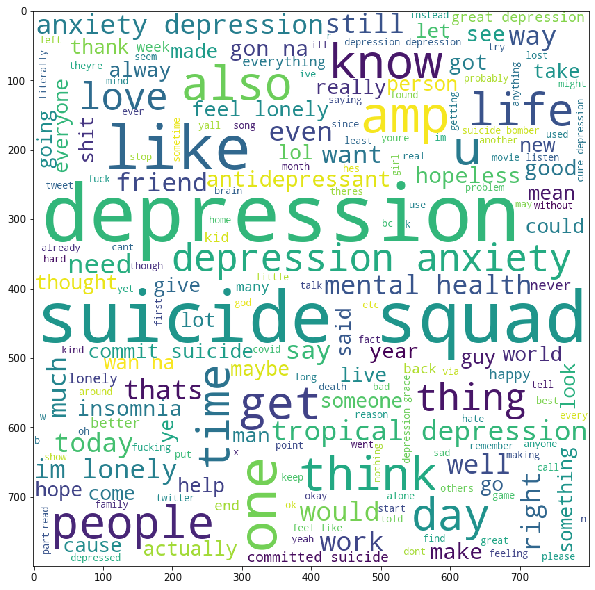

In [52]:
show_word_cloud(''.join(depressive_clean_tweets))

In [53]:
random_tweets = random_dataset['text'].values
random_clean_tweets = [clean_tweet(tweet) for tweet in random_tweets]

In [54]:
random_clean_tweets = [t for t in random_clean_tweets if len(str(t)) > 6]
print(len(random_clean_tweets))

226010


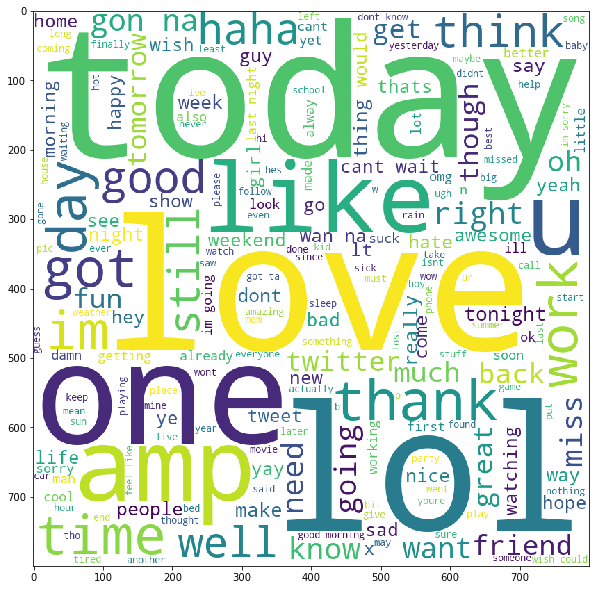

In [55]:
show_word_cloud(''.join(random_clean_tweets))